# Evaluate Treehouse Disease Classifier

In [2]:
import os
import json
import requests
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

# Switch to a scratch data directory so all paths are local
os.chdir(os.path.expanduser("~/data/treehouse"))

# Load Trained Model and Test Data

In [3]:
# Load params and trained model
with open("params.json") as f:  
    params = json.load(f)

model = tf.keras.models.load_model("model.h5")
model.summary()

W0614 21:10:02.512233 140038179067712 deprecation.py:506] From /tf/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0614 21:10:02.515690 140038179067712 deprecation.py:506] From /tf/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0614 21:10:02.520536 140038179067712 deprecation.py:506] From /tf/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecat

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5545)]            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5545)              22180     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                177472    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 29)                957 

In [4]:
print("Loading dataset...")
X = pd.read_hdf("treehouse-pruned.h5", "samples")
Y = pd.read_hdf("treehouse-pruned.h5", "labels")
print("Loaded {} samples with {} features and {} labels".format(X.shape[0], X.shape[1], Y.shape[1]))

Loading dataset...
Loaded 10208 samples with 5545 features and 4 labels


In [6]:
# Convert disease site to numeric values so we can plot confusion and errors
from sklearn.preprocessing import LabelEncoder

disease_encoder = LabelEncoder()
Y["disease_value"] = pd.Series(disease_encoder.fit_transform(Y["disease"]), index=Y.index)

In [7]:
Y.disease.value_counts()

breast invasive carcinoma                1099
glioma                                    606
kidney clear cell carcinoma               531
head & neck squamous cell carcinoma       520
lung adenocarcinoma                       516
thyroid carcinoma                         514
lung squamous cell carcinoma              498
prostate adenocarcinoma                   496
skin cutaneous melanoma                   469
ovarian serous cystadenocarcinoma         427
acute myeloid leukemia                    420
stomach adenocarcinoma                    414
bladder urothelial carcinoma              407
hepatocellular carcinoma                  375
cervical & endocervical cancer            306
colon adenocarcinoma                      291
kidney papillary cell carcinoma           289
acute lymphoblastic leukemia              269
pheochromocytoma & paraganglioma          182
esophageal carcinoma                      182
uterine corpus endometrioid carcinoma     181
pancreatic adenocarcinoma         

In [8]:
X_train = X.values[params["train_indices"]]
Y_train = Y.iloc[params["train_indices"]]

X_test = X.values[params["test_indices"]]
Y_test = Y.iloc[params["test_indices"]]

In [9]:
# Predict all test samples
predictions = model.predict(X_test)

## Evaluate

In [10]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix optionally normalized by class size
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

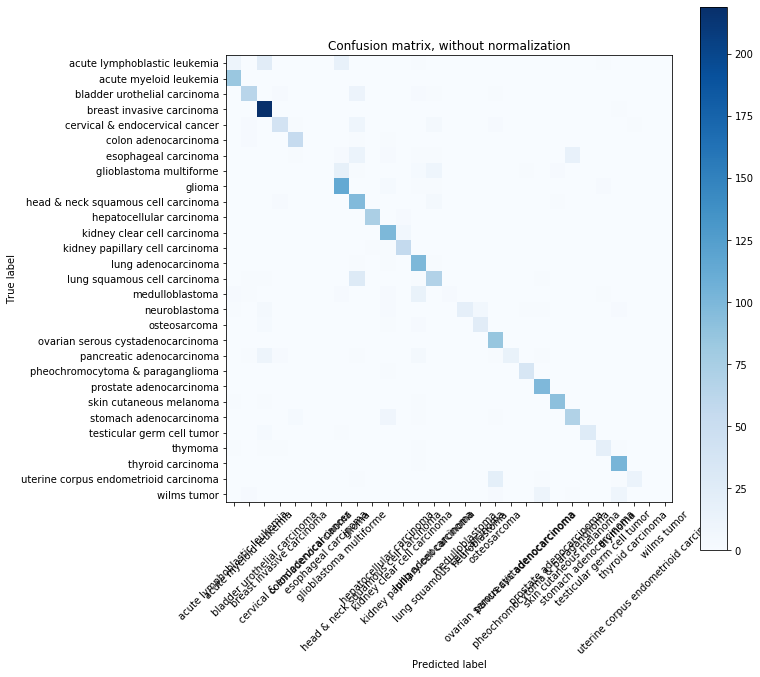

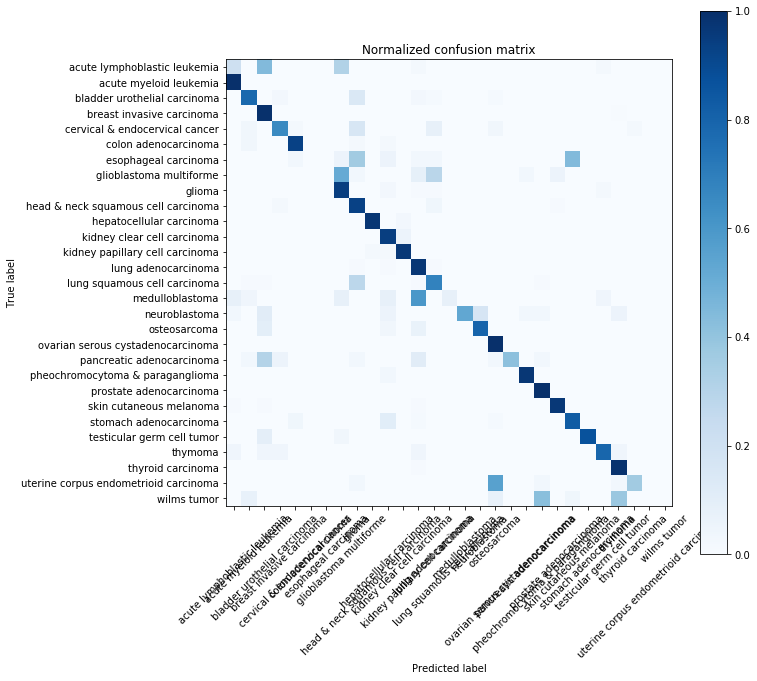

In [11]:
# Plot confusion matrix for primary site
import sklearn.metrics
import matplotlib.ticker as ticker

confusion_matrix = sklearn.metrics.confusion_matrix(
    Y_test["disease_value"], np.array([np.argmax(p[1:-1]) for p in predictions]))

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion_matrix, classes=params["disease"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion_matrix, classes=params["disease"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()